In [1]:
import os
from diffaux.disk_bulge_modeling.generate_bulge_disk_sample import (
    get_bulge_disk_test_sample,
    get_bulge_disk_decomposition,
)
from jax import random as jran
import numpy as np
import jax.numpy as jnp

ran_key = jran.key(0)

### Generate subcat and SFH catalog

In [2]:
halo_key, ran_key = jran.split(ran_key, 2)
lgmp_min = 11.0
redshift = 0.05
Lbox = 100.0
diffstar_cens = get_bulge_disk_test_sample(halo_key, lgmp_min=lgmp_min, redshift=redshift, Lbox=Lbox)

Generated data shape =  (32861, 100)
Check times calculated from redshifts are within 1e-3 for z< 3: True


### Explore Existing Model for Disk-Bulge Decomposition with logsm0 Bug-fixed version

In [3]:
disk_bulge_key, ran_key = jran.split(ran_key, 2)
diffstar_cens = get_bulge_disk_decomposition(disk_bulge_key, diffstar_cens, new_model=False)
print(diffstar_cens.keys())

dict_keys(['subcat', 't_table', 't_obs', 'sfh', 'smh', 'mc_quenched', 'sfh_params', 'logsm_obs', 'logssfr_obs', 'sfh_ms', 'sfh_q', 'frac_q', 'sfh_params_ms', 'sfh_params_q', 'sSFR', 'z_table', 'tcrit_bulge', 'fbulge_early', 'fbulge_late', 'bth', 'eff_bulge', 'sfh_bulge', 'smh_bulge', 'sSFR_bulge', 'smh_disk', 'sfh_disk', 'sSFR_disk'])


In [6]:
zvalues = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
dz = 0.1
redshifts = diffstar_cens["z_table"]
from diffaux.validation.plot_disk_bulge import (
    plot_qs_nocuts,
    plot_histories,
    plot_q_with_cuts,
    plot_q1_q2,
    plot_q1_vs_q2,
)

plotdir = "/Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots"
from diffstar.utils import cumulative_mstar_formed_galpop

smh = cumulative_mstar_formed_galpop(diffstar_cens["t_table"], diffstar_cens["sfh"])

[ 8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6
 10.8 11.  11.2 11.4 11.6]
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/N_vs_logM_disk_bulge_total.png


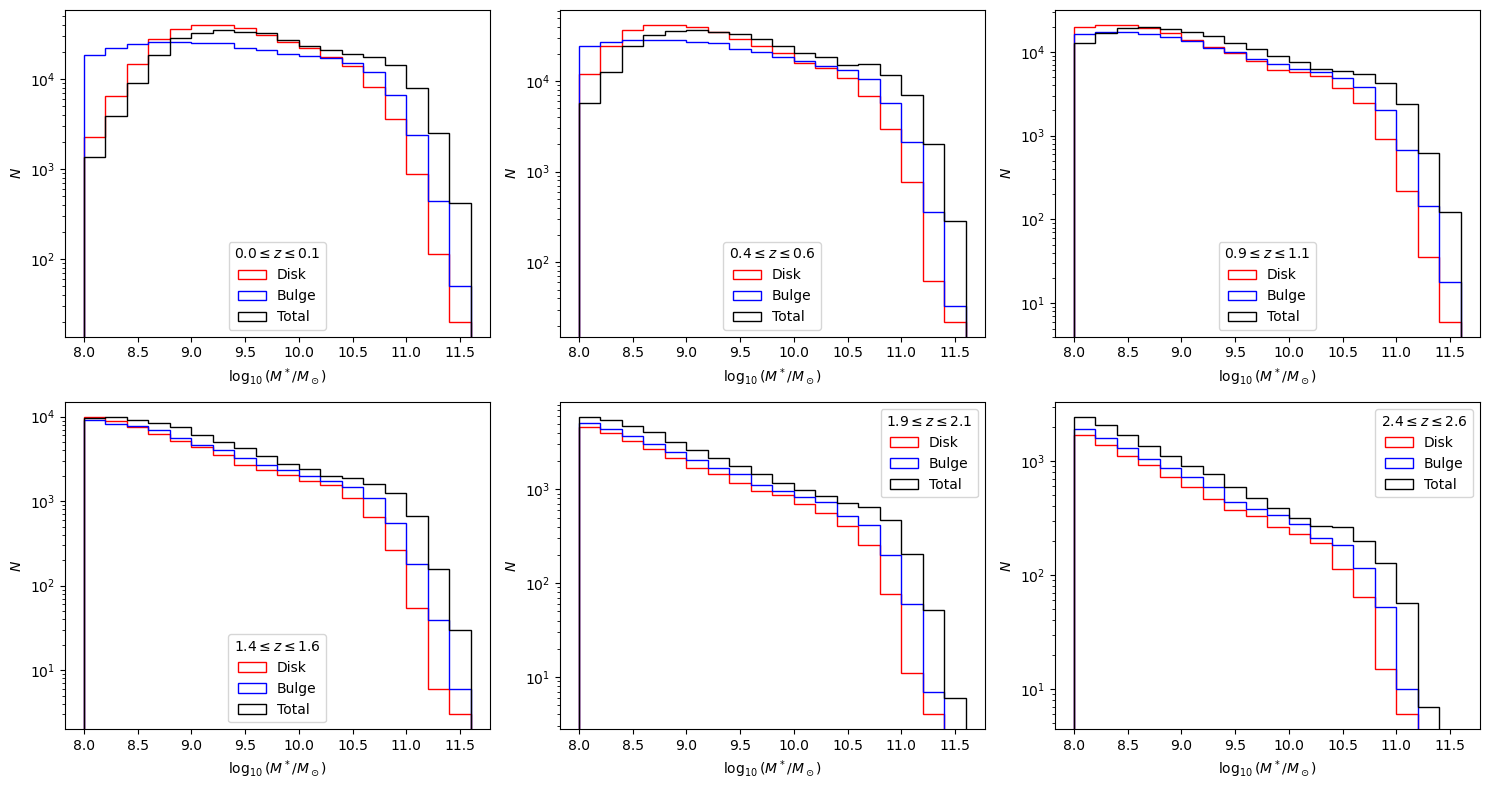

In [7]:
# plot smf
mass_bins = np.linspace(8.0, 11.6, 19)
print(mass_bins)
plot_qs_nocuts(
    [
        jnp.log10(diffstar_cens["smh_disk"]),
        jnp.log10(diffstar_cens["smh_bulge"]),
        jnp.log10(diffstar_cens["smh"]),
    ],
    zvalues,
    redshifts,
    dz=0.1,
    bins=mass_bins,
    qlabels=["Disk", "Bulge", "Total"],
    yscale="log",
    xscale="linear",
    plotdir=plotdir,
)

In [10]:
qs = [
    diffstar_cens["eff_bulge"],
    diffstar_cens["smh_bulge"],
    diffstar_cens["smh"],
    diffstar_cens["bth"],
    # sfh_bulge, diffstar_cens['sfh'],
    diffstar_cens["sSFR_bulge"],
    diffstar_cens["sSFR"],
]
ylabels = [
    "Bulge_efficiency",
    "Bulge_SMH ($M_\\odot$)",
    "SMH ($M_\\odot$)",
    "B/T",
    #'Bulge_SFH ($M_\\odot \\mathrm{yr}^{-1}$)', 'SFH ($M_\\odot \\mathrm{yr}^{-1}$)',
    "Bulge_sSFH ($\\mathrm{yr}^{-1}$)",
    "sSFH ($\\mathrm{yr}^{-1}$)",
]
labels = [
    "effB",
    "SMHB",
    "SMH",
    "BT",
    #'SFHB', 'SFH',
    "sSFRB",
    "sSFR",
]

32746
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histories/History_effB_SMHB_SMH_BT_sSFRB_sSFR_Mstar_z0_log_step_500.png


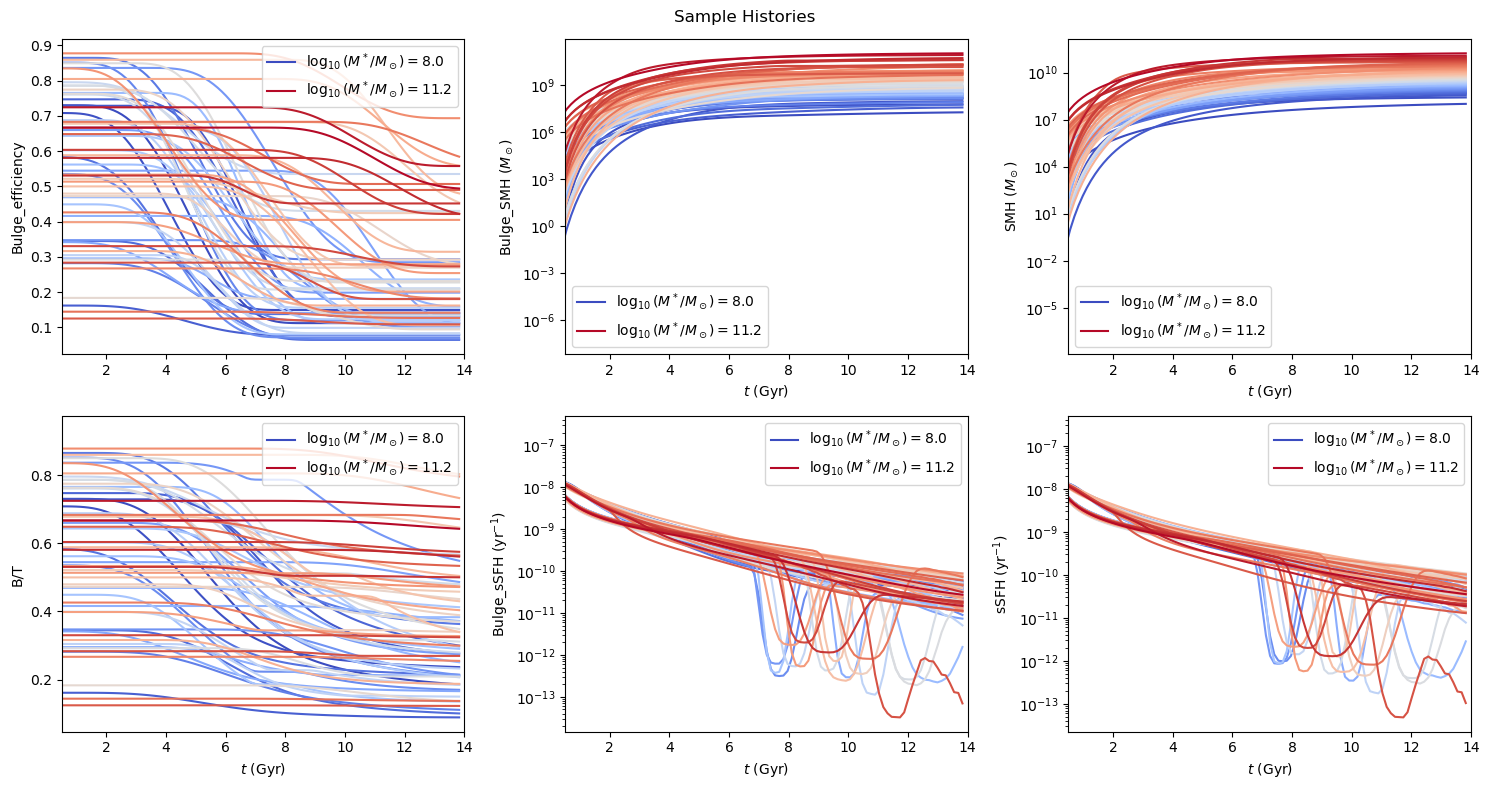

In [11]:
logM_min = 8.0
row_mask = np.log10(diffstar_cens["smh"][:, -1]) > logM_min
print(np.count_nonzero(row_mask))
plot_histories(
    qs,
    diffstar_cens["t_table"],
    labels,
    ylabels,
    plotdir=plotdir,
    color_array=np.log10(diffstar_cens["smh"][:, -1]),
    row_mask=row_mask,
    yscale="log",
    plot_label="Mstar_z0",
    step=500,
    lgnd_label="$\\log_{{10}}(M^*/M_\\odot) = {:.1f}$",
)

In [12]:
# setup mass mask
logMz0_min = 8.0
mass_mask = np.log10(diffstar_cens["smh"][:, -1]) > logMz0_min
lgnd_title = ", $\\log_{{10}}(M^*_{{z=0}}/M_\\odot) > {:.1f}$".format(logMz0_min)

plotdir = "/Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots"

Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/BT_cut_on_log_sSFR.png


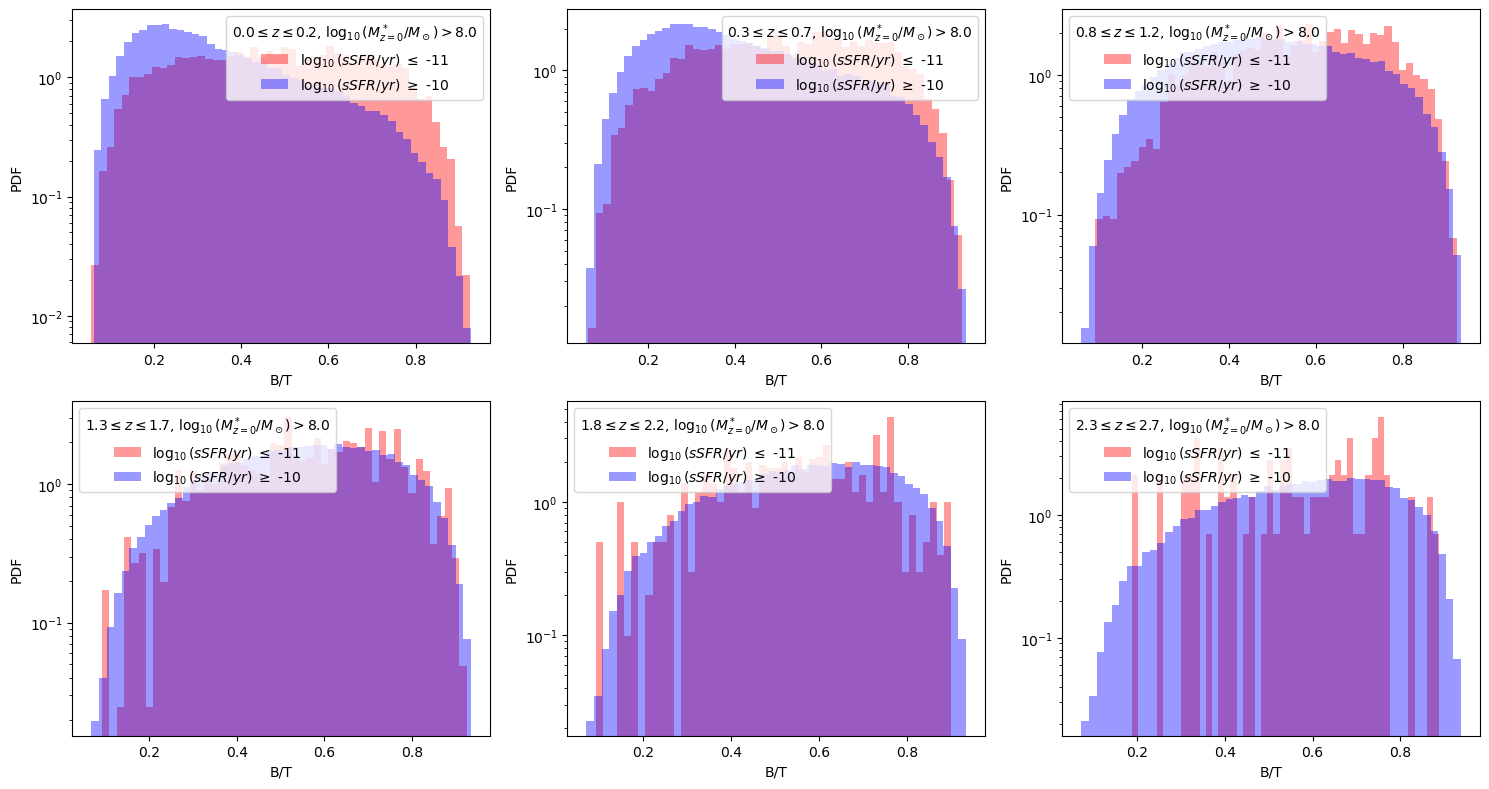

In [13]:
plot_q_with_cuts(
    diffstar_cens["bth"][mass_mask],
    zvalues,
    redshifts,
    jnp.log10(diffstar_cens["sSFR"])[mass_mask],
    [-11, -10],
    dz=0.2,
    lgnd_title=lgnd_title,
    plotdir=plotdir,
)

Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/effB_cut_on_log_sSFR.png


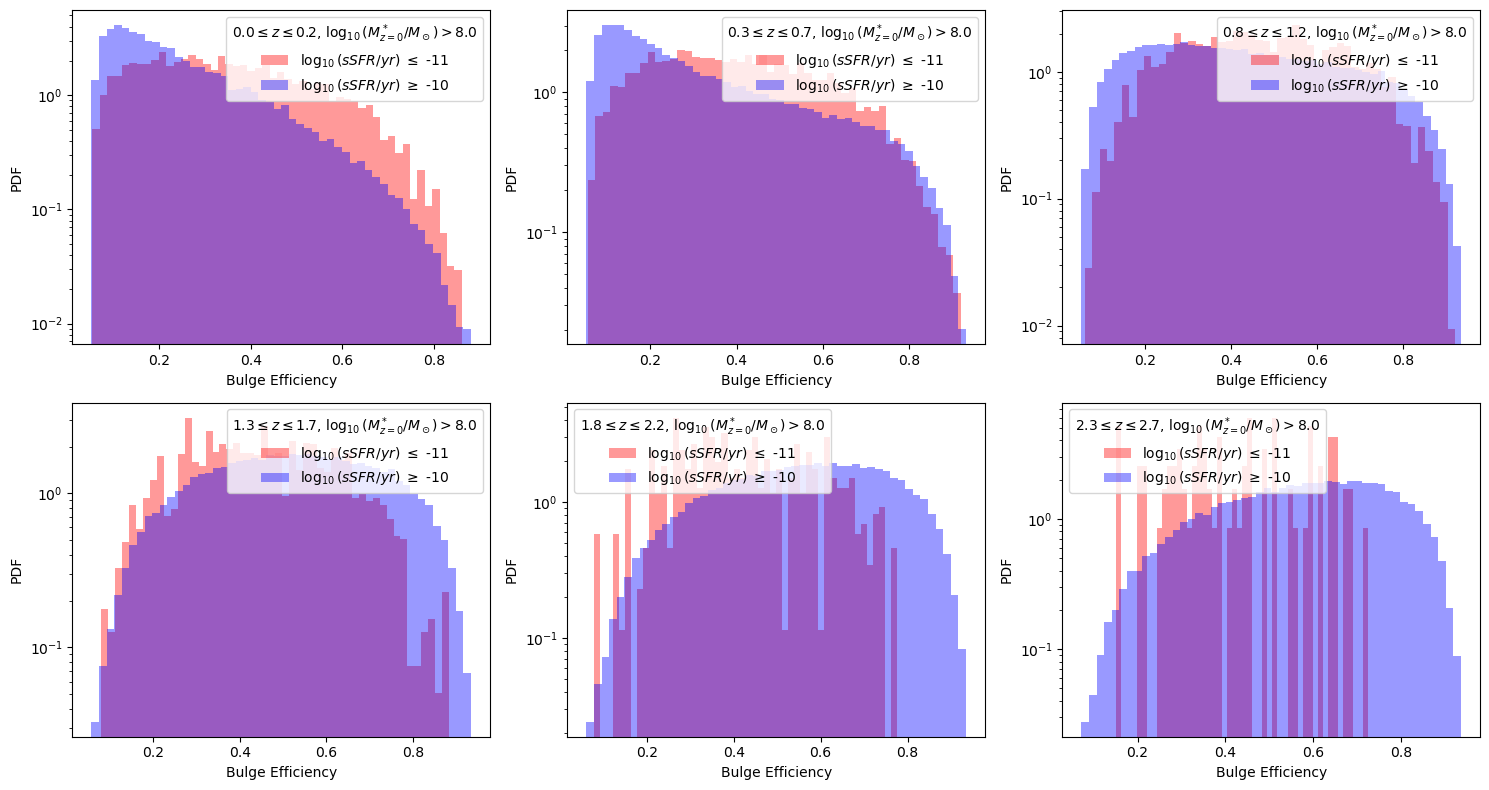

In [14]:
plot_q_with_cuts(
    diffstar_cens["eff_bulge"][mass_mask],
    zvalues,
    redshifts,
    np.log10(diffstar_cens["sSFR"])[mass_mask],
    [-11, -10],
    dz=0.2,
    pltname="effB_cut_on_{}.png",
    xlabel="Bulge Efficiency",
    lgnd_title=lgnd_title,
    plotdir=plotdir,
)

(32861,)
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/bulge_mass_cut_on_log_sSFR.png


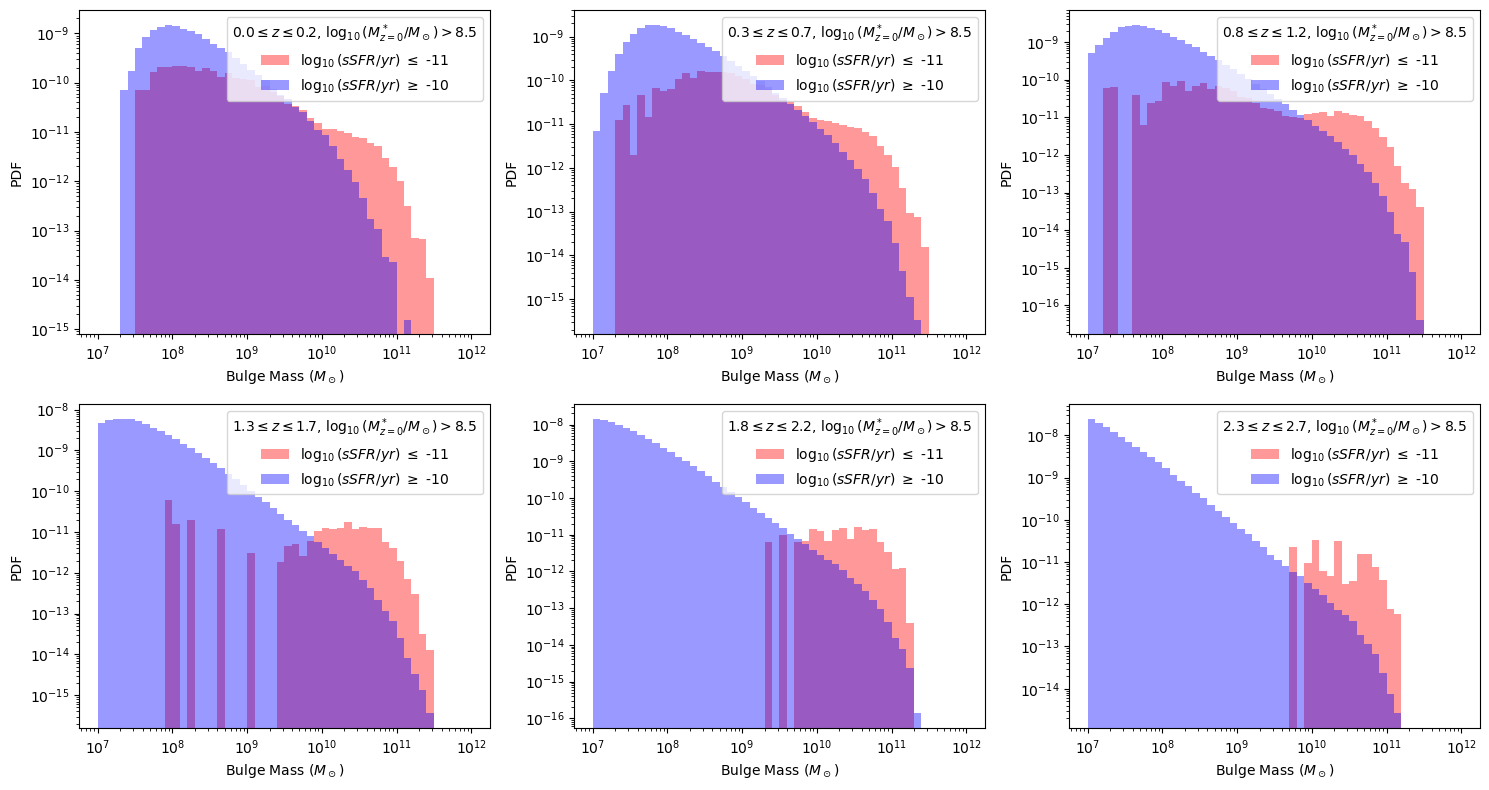

In [15]:
logMz0_min = 8.5
mass_mask = np.log10(diffstar_cens["smh"][:, -1]) > logMz0_min
print(mass_mask.shape)
bins = np.logspace(7, 12, 51)
lgnd_title = ", $\\log_{{10}}(M^*_{{z=0}}/M_\\odot) > {:.1f}$".format(logMz0_min)
# print(lgnd_title)

plot_q_with_cuts(
    diffstar_cens["smh_bulge"][mass_mask],
    zvalues,
    redshifts,
    np.log10(diffstar_cens["sSFR"])[mass_mask],
    [-11, -10],
    dz=0.2,
    pltname="bulge_mass_cut_on_{}.png",
    xlabel="Bulge Mass ($M_\\odot$)",
    xscale="log",
    bins=bins,
    lgnd_title=lgnd_title,
    plotdir=plotdir,
)

In [16]:
# logMz0_min = 8.5
# mass_mask = np.log10(diffstar_cens['smh'][:, -1]) > logMz0_min
bins = np.logspace(-14, -7, 71)
mass_bins = np.linspace(7.5, 11.5, 5)
print(mass_bins, np.min(bins), np.max(bins))
# test masking
zmask = redshifts < 0.2
q1_z = diffstar_cens["sSFR_bulge"][:, zmask]
cut_array_z = np.log10(diffstar_cens["smh"])[:, zmask]
cut_mask = (cut_array_z[:, -1] >= 8.5) & (cut_array_z[:, -1] < 11.5)
print(cut_mask.shape, np.where(cut_mask == False)[0][0:2])
cut_mask = np.broadcast_to(cut_mask, (np.count_nonzero(zmask), len(cut_mask))).T
print(cut_mask.shape)

[ 7.5  8.5  9.5 10.5 11.5] 1e-14 1e-07
(32861,) [ 59 125]
(32861, 18)


0.0 15822
0.5 36120
1.0 75000
1.5 87598
2.0 75305
2.5 39873
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/sSFR_cut_on_log_M0_7.5_8.5.png
0.0 241848
0.5 311367
1.0 182196
1.5 86408
2.0 44625
2.5 17406
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/sSFR_cut_on_log_M0_8.5_9.5.png
0.0 237276
0.5 246666
1.0 98580
1.5 36533
2.0 17015
2.5 6129
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/sSFR_cut_on_log_M0_9.5_10.5.png
0.0 95310
0.5 94416
1.0 37188
1.5 12761
2.0 5370
2.5 1836
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Histograms/sSFR_cut_on_log_M0_10.5_11.5.png


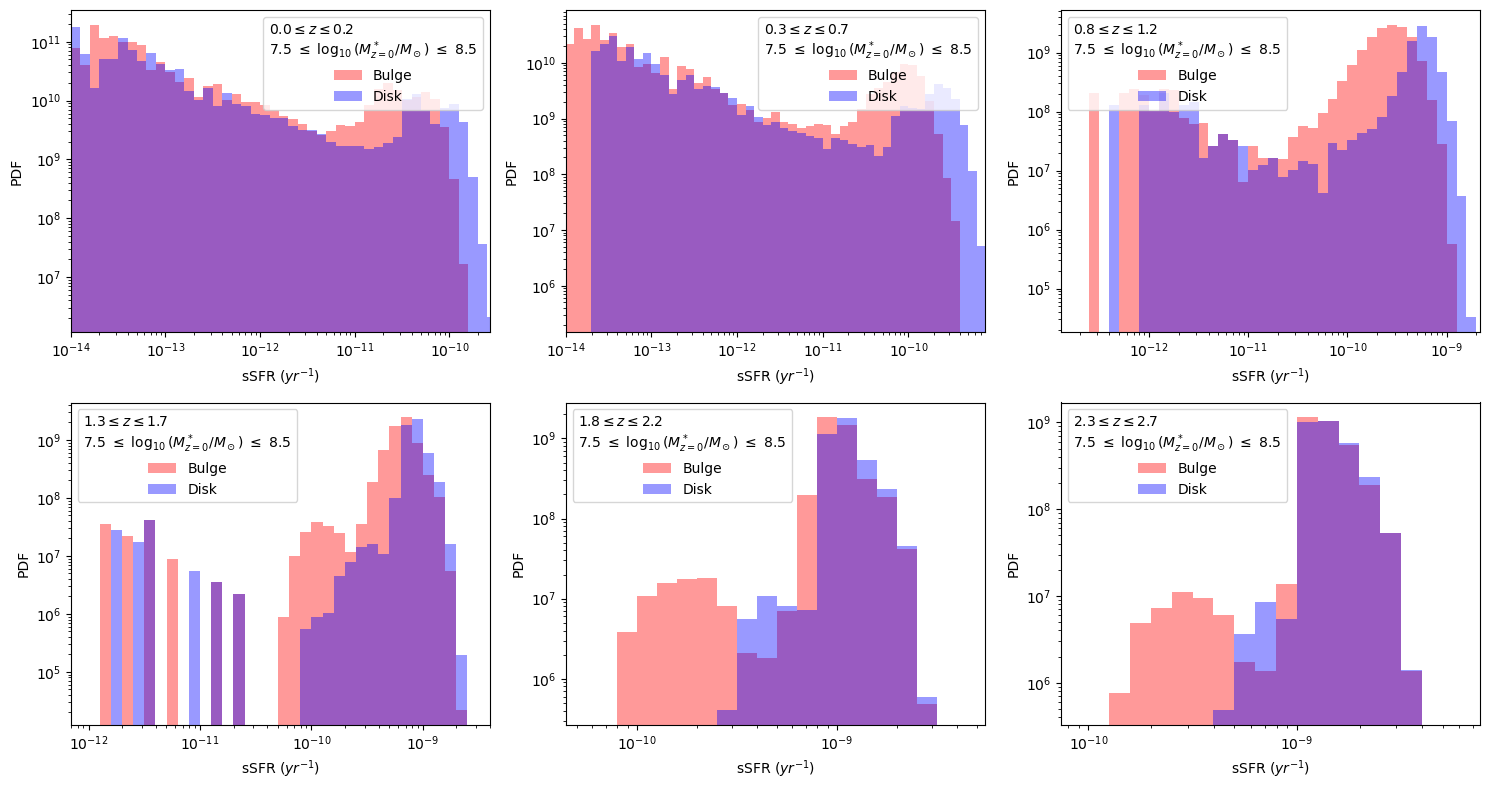

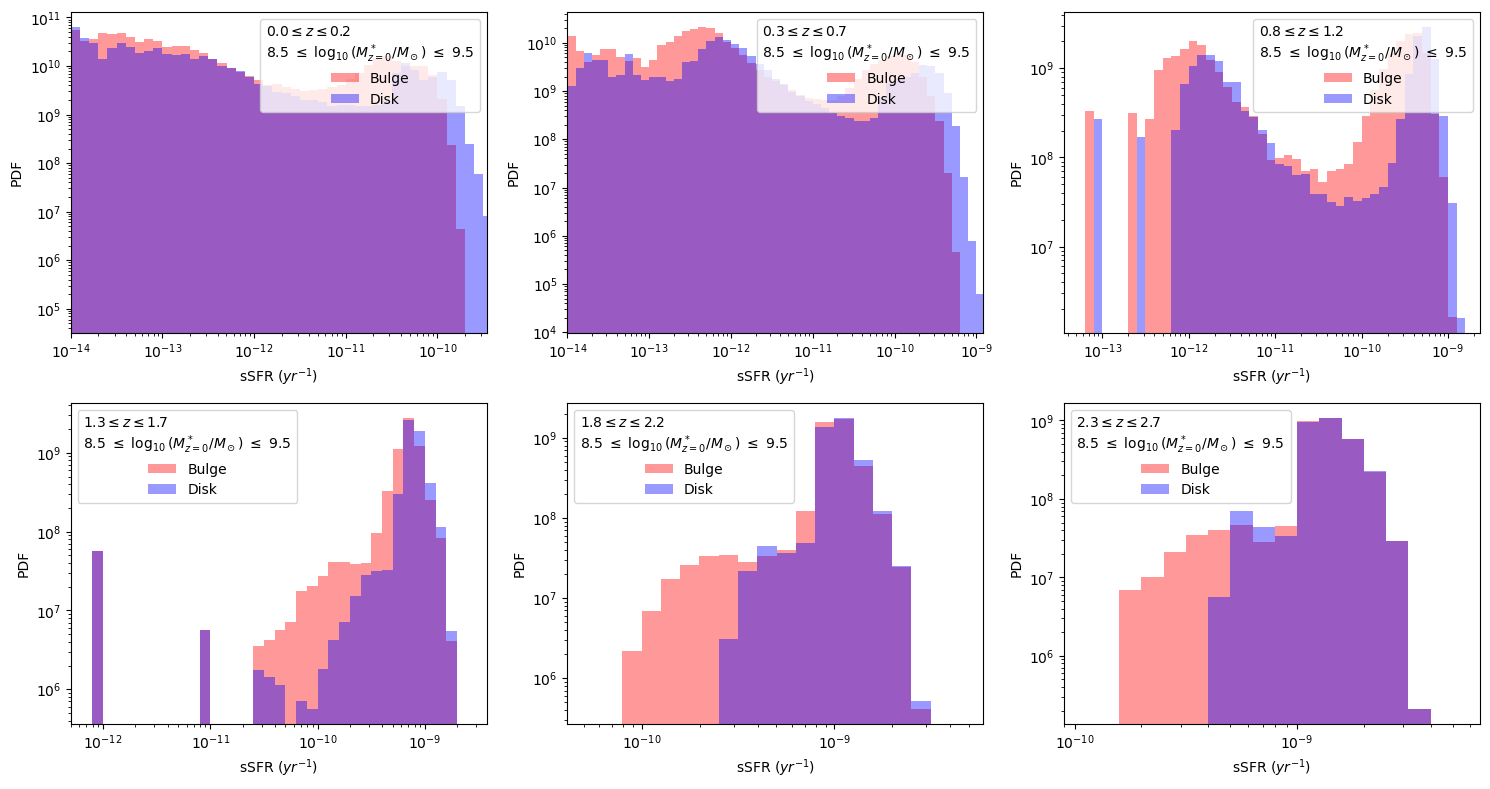

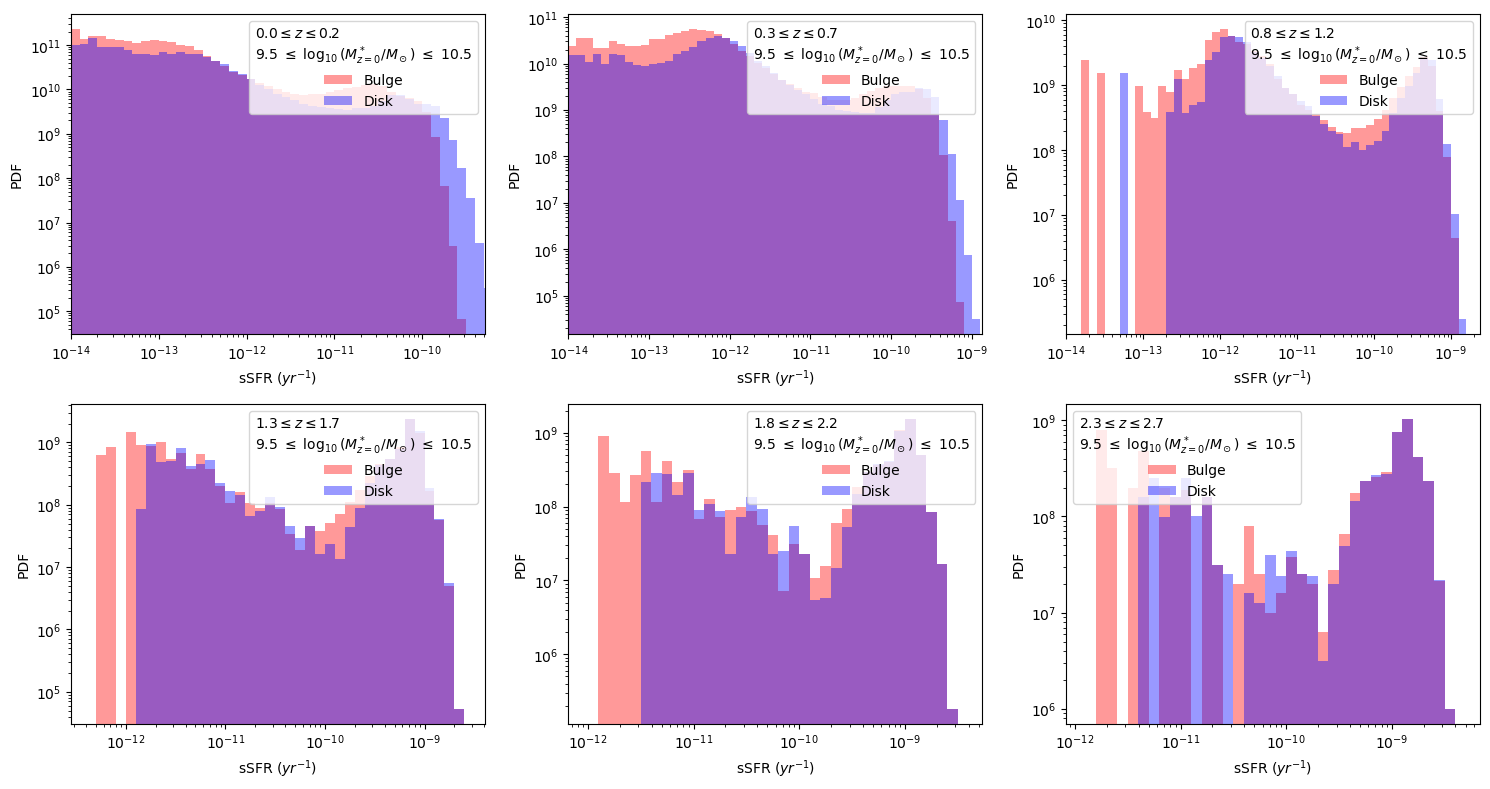

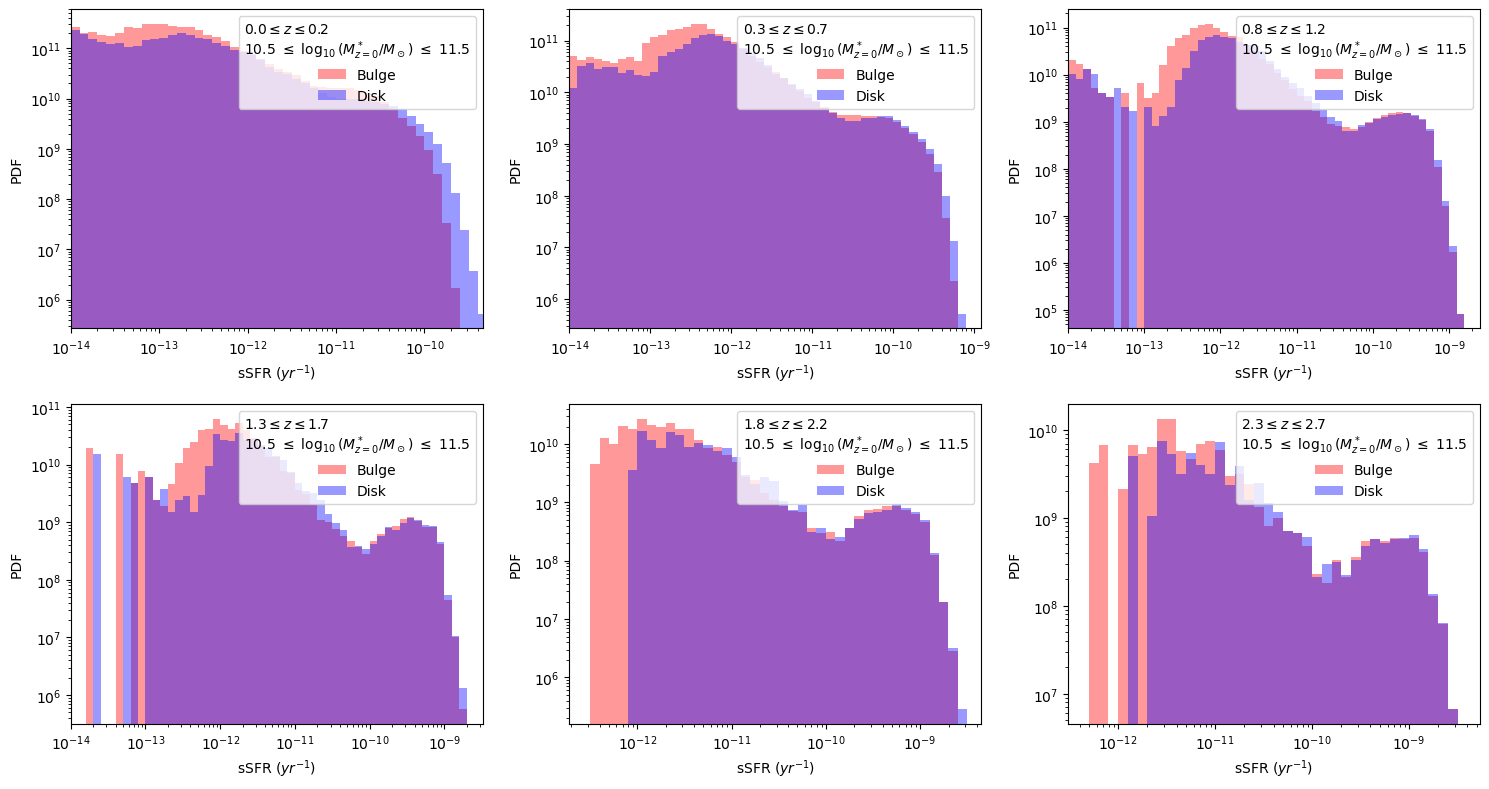

In [17]:
for m_lo, m_hi in zip(mass_bins[0:-1], mass_bins[1:]):
    plot_q1_q2(
        diffstar_cens["sSFR_bulge"],
        diffstar_cens["sSFR_disk"],
        zvalues,
        redshifts,
        np.log10(diffstar_cens["smh"]),
        m_lo,
        m_hi,
        dz=0.2,
        xname="log_M0_{:.1f}_{:.1f}",
        cut_name="$\\log_{10}(M^*_{z=0}/M_\\odot)$",
        cut_at_z0=True,
        bins=bins,
        plotdir=plotdir,
    )

Selected 2034 objects
8.4573 11.378591 -25.23462 -9.724696
Selected 2053 objects
8.028308 11.444849 -24.987707 -9.318783
Selected 2051 objects
7.530058 11.466281 -12.229924 -9.028298
Selected 2059 objects
7.0553675 11.360743 -12.046596 -8.805868
Selected 2033 objects
6.318927 11.384603 -11.873701 -8.57712
Selected 1966 objects
5.6538553 11.194626 -11.463597 -8.475212
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Scatter/sSFR_vs_Mstar_log_M0_min_8.5_logssfr_min_14.png


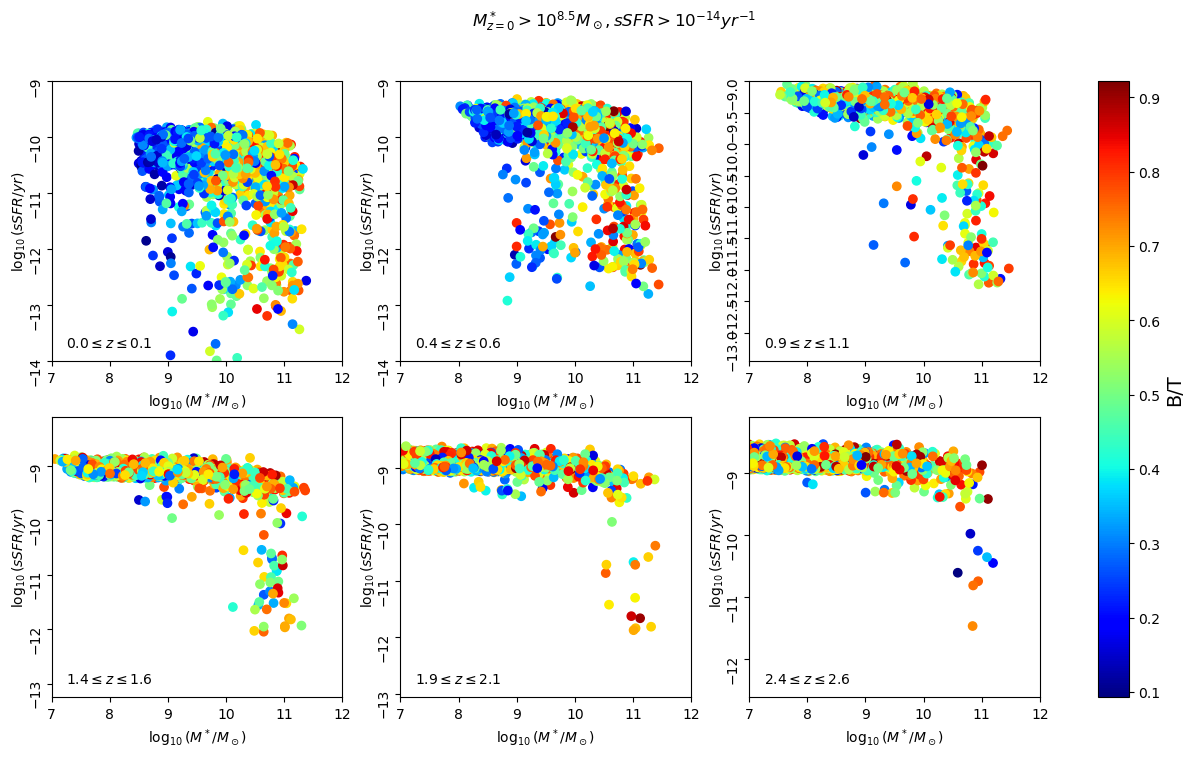

In [20]:
logMz0_min = 8.5
logssfr_min = -14
mass_mask = np.log10(diffstar_cens["smh"][:, -1]) > logMz0_min
title = "$M^*_{{z=0}} > 10^{{{:.1f}}} M_\\odot, sSFR > 10^{{{}}} yr^{{-1}}$".format(logMz0_min, logssfr_min)
xname = "log_M0_min_{:.1f}_logssfr_min_{}".format(logMz0_min, -logssfr_min)
plot_q1_vs_q2(
    jnp.log10(diffstar_cens["smh"][mass_mask]),
    jnp.log10(diffstar_cens["sSFR"][mass_mask]),
    zvalues,
    redshifts,
    diffstar_cens["bth"][mass_mask],
    title=title,
    xname=xname,
    ymin=logssfr_min,
    N=2000,
    plotdir=plotdir,
)

Selected 1959 objects
7.36743 11.2887125 -25.472216 -9.787439
Selected 1940 objects
7.296797 11.470253 -25.045988 -9.319999
Selected 1998 objects
7.0209 11.469569 -12.333785 -9.065011
Selected 2039 objects
6.692025 11.139131 -12.248488 -8.812952
Selected 2033 objects
5.6828012 11.226205 -11.659047 -8.575259
Selected 2027 objects
5.349582 11.121342 -11.195089 -8.489212
Saving /Users/kovacs/cosmology/BulgeDisk/DiskBulgePlots/DiskBulge_Scatter/sSFR_vs_Mbulge_log_M0_min_8.5_logssfr_min_14.png


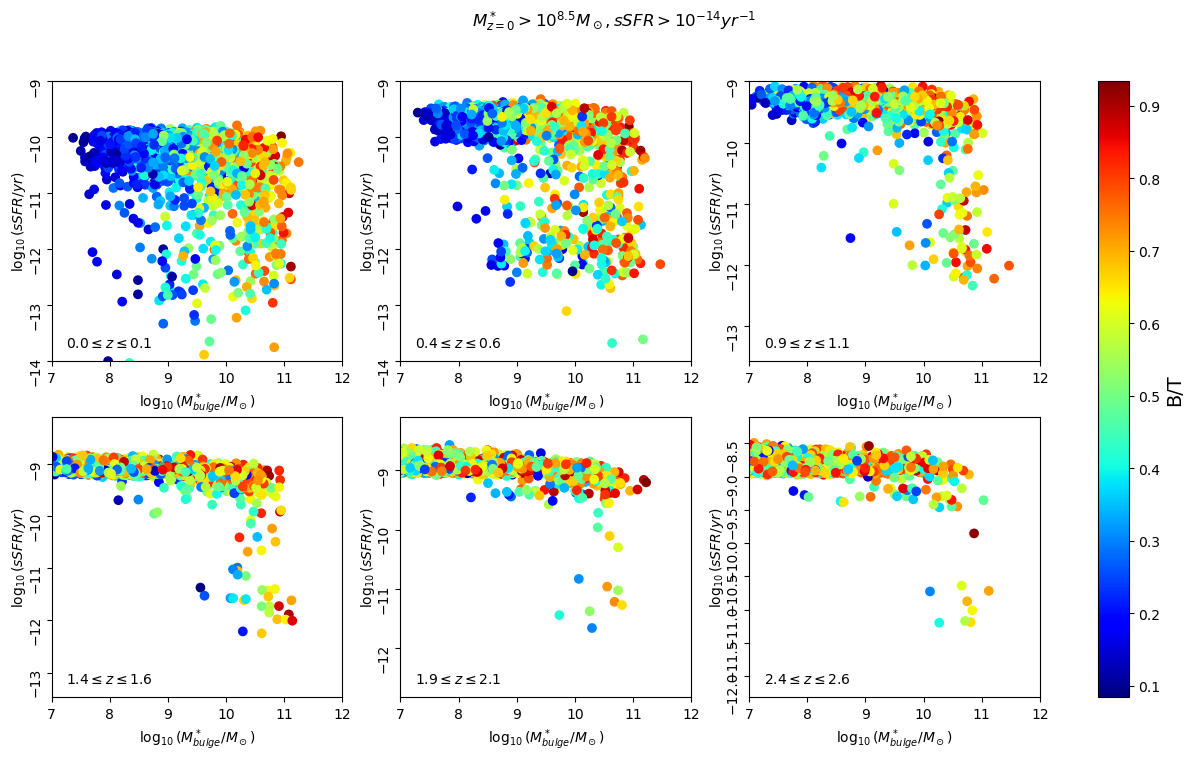

In [19]:
logMz0_min = 8.5
logssfr_min = -14
mass_mask = np.log10(diffstar_cens["smh"][:, -1]) > logMz0_min
title = "$M^*_{{z=0}} > 10^{{{:.1f}}} M_\\odot, sSFR > 10^{{{}}} yr^{{-1}}$".format(logMz0_min, logssfr_min)
xname = "log_M0_min_{:.1f}_logssfr_min_{}".format(logMz0_min, -logssfr_min)
plot_q1_vs_q2(
    jnp.log10(diffstar_cens["smh_bulge"][mass_mask]),
    jnp.log10(diffstar_cens["sSFR"][mass_mask]),
    zvalues,
    redshifts,
    diffstar_cens["bth"][mass_mask],
    title=title,
    xname=xname,
    ymin=logssfr_min,
    N=2000, plotdir=plotdir,
    xlabel="$\\log_{10}(M^*_{bulge}/M_\\odot)$",
    pltname="sSFR_vs_Mbulge_{}.png",
)